## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Users\ryanl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
Build your own model
"""
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10]
FACTOR = [0.5, 0.1, 0.05]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 41/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8117 - acc: 0.7405 - val_loss: 1.4732 - val_acc: 0.4997
Epoch 42/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.8096 - acc: 0.7416 - val_loss: 1.4735 - val_acc: 0.5010
Epoch 43/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.8082 - acc: 0.7422 - val_loss: 1.4737 - val_acc: 0.5026
Epoch 44/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.8055 - acc: 0.7441 - val_loss: 1.4728 - val_acc: 0.50138093 - ac
Epoch 45/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.8049 - acc: 0.7432
Epoch 00045: reducing learning rate to 3.125000148429535e-05.
50000/50000 [==============================] - 11s 218us/step - loss: 0.8045 - acc: 0.7435 - val_loss: 1.4740 - val_acc: 0.5005
Epoch 46/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.8023 - acc: 0.7448 - val_loss: 1.4736 - val_acc: 0.5013
Epoch

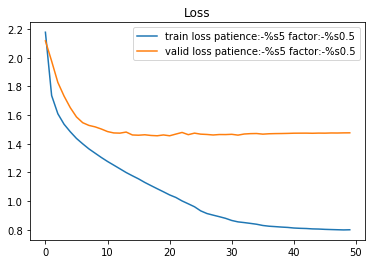

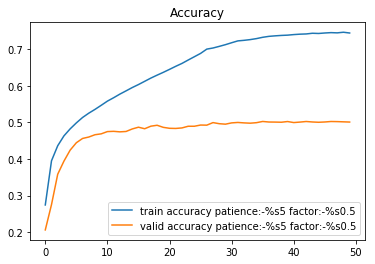

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

49152/50000 [============================>.] - ETA: 0s - loss: 0.7827 - acc: 0.7508
Epoch 00046: reducing learning rate to 1.0000001111620805e-07.
50000/50000 [==============================] - 11s 222us/step - loss: 0.7825 - acc: 0.7508 - val_loss: 1.4870 - val_acc: 0.4991
Epoch 47/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7829 - acc: 0.7506 - val_loss: 1.4870 - val_acc: 0.4992
Epoch 48/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7816 - acc: 0.7515 - val_loss: 1.4870 - val_acc: 0.4993
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7825 - acc: 0.7503 - val_loss: 1.4870 - val_acc: 0.4994
Epoch 50/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7817 - acc: 0.7501 - val_loss: 1.4870 - val_acc: 0.4994


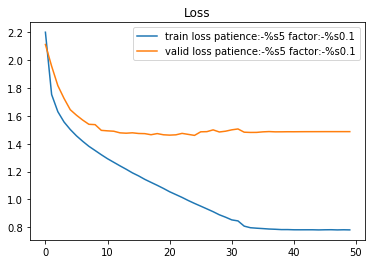

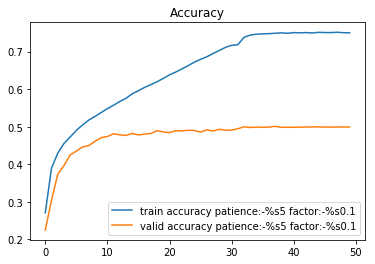

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 9s 188us/step - loss: 0.8387 - acc: 0.7294 - val_loss: 1.4451 - val_acc: 0.5124
Epoch 46/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8384 - acc: 0.7288 - val_loss: 1.4451 - val_acc: 0.5124
Epoch 47/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.8385 - acc: 0.7292 - val_loss: 1.4451 - val_acc: 0.5122
Epoch 48/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.8389 - acc: 0.7297
Epoch 00048: reducing learning rate to 3.1250002585636594e-10.
50000/50000 [==============================] - 9s 181us/step - loss: 0.8387 - acc: 0.7296 - val_loss: 1.4451 - val_acc: 0.5123
Epoch 49/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.8378 - acc: 0.7297 - val_loss: 1.4451 - val_acc: 0.5124
Epoch 50/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.8380 - acc: 0.7292 - val_loss: 1.4451 - val_acc: 0.5127


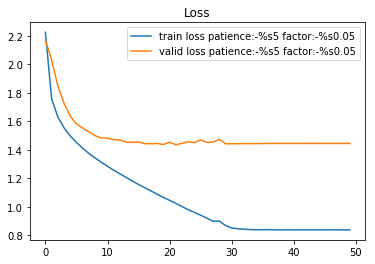

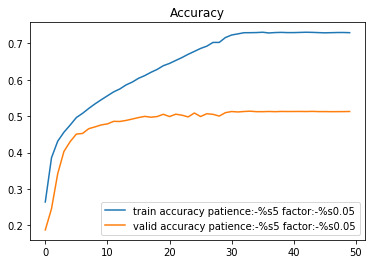

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
__________

Epoch 47/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.6643 - acc: 0.7984 - val_loss: 1.5345 - val_acc: 0.4926
Epoch 48/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.6601 - acc: 0.7996 - val_loss: 1.5365 - val_acc: 0.4905
Epoch 49/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.6551 - acc: 0.8020 - val_loss: 1.5382 - val_acc: 0.4902
Epoch 50/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.6489 - acc: 0.8041 - val_loss: 1.5446 - val_acc: 0.4911


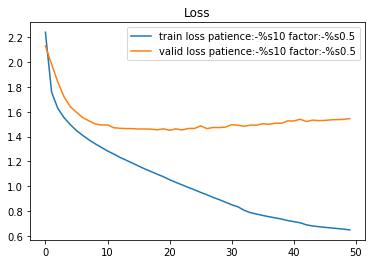

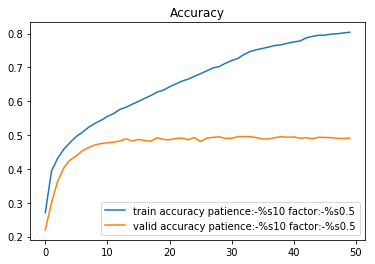

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
__________

Epoch 47/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7222 - acc: 0.7746 - val_loss: 1.4977 - val_acc: 0.4968
Epoch 48/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.7225 - acc: 0.7744 - val_loss: 1.4977 - val_acc: 0.4964
Epoch 49/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.7217 - acc: 0.7754 - val_loss: 1.4978 - val_acc: 0.496408 - acc: 
Epoch 50/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.7217 - acc: 0.7737 - val_loss: 1.4979 - val_acc: 0.4963


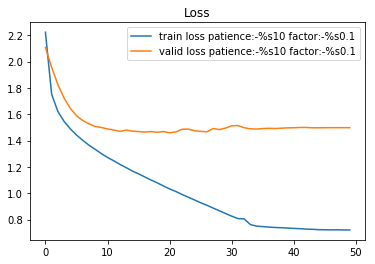

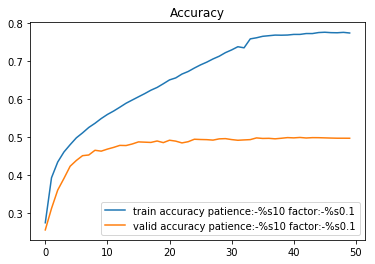

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 12s 231us/step - loss: 0.7927 - acc: 0.7455 - val_loss: 1.4751 - val_acc: 0.4994
Epoch 48/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7926 - acc: 0.7473 - val_loss: 1.4751 - val_acc: 0.4993
Epoch 49/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.7936 - acc: 0.7455 - val_loss: 1.4752 - val_acc: 0.4994
Epoch 50/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.7924 - acc: 0.7465
Epoch 00050: reducing learning rate to 1.2500000821091816e-07.
50000/50000 [==============================] - 11s 218us/step - loss: 0.7927 - acc: 0.7462 - val_loss: 1.4751 - val_acc: 0.4997


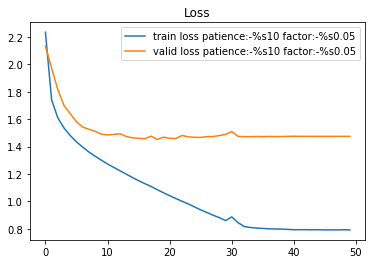

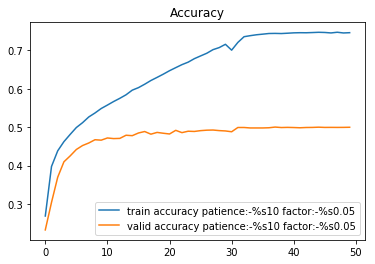

In [10]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
%matplotlib inline

"""
Set model checkpoint callbacks
Write your training loop and show the results
"""
for patience in PATIENCE:
    for factor in FACTOR:
        reduce_lr = ReduceLROnPlateau(factor=factor, 
                                      min_lr=1e-12, 
                                      monitor='val_loss', 
                                      patience=patience, 
                                      verbose=1)

        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[reduce_lr]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        # 繪製結果
        """
        plot the results
        """
        plt.plot(range(len(train_loss)), train_loss, label="train loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_loss)), valid_loss, label="valid loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Loss")
        plt.show()

        plt.plot(range(len(train_acc)), train_acc, label="train accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Accuracy")
        plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
__________

Epoch 44/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.3258 - acc: 0.9181 - val_loss: 1.6921 - val_acc: 0.5239
Epoch 45/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.3245 - acc: 0.9193 - val_loss: 1.6888 - val_acc: 0.5255
Epoch 46/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.3219 - acc: 0.9201 - val_loss: 1.6945 - val_acc: 0.5247
Epoch 47/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.3213 - acc: 0.9181 - val_loss: 1.6939 - val_acc: 0.5242
Epoch 48/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.3191 - acc: 0.9198- ETA: 2s - loss: 0.3183 -
Epoch 00048: reducing learning rate to 7.812500371073838e-06.
50000/50000 [==============================] - 11s 224us/step - loss: 0.3191 - acc: 0.9198 - val_loss: 1.7005 - val_acc: 0.5222
Epoch 49/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.3167 - acc: 0.9205 - val_loss: 1.6981 - val_

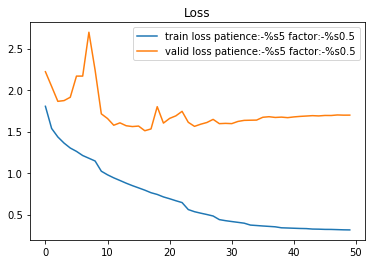

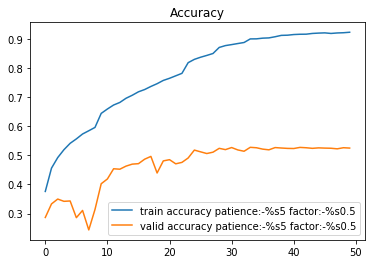

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 10s 208us/step - loss: 0.6544 - acc: 0.7864 - val_loss: 1.3384 - val_acc: 0.5497
Epoch 45/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.6540 - acc: 0.7875
Epoch 00045: reducing learning rate to 1.000000082740371e-09.
50000/50000 [==============================] - 10s 197us/step - loss: 0.6537 - acc: 0.7875 - val_loss: 1.3384 - val_acc: 0.5497
Epoch 46/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6537 - acc: 0.7878 - val_loss: 1.3384 - val_acc: 0.5496
Epoch 47/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.6544 - acc: 0.7876 - val_loss: 1.3384 - val_acc: 0.5495
Epoch 48/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.6538 - acc: 0.7870 - val_loss: 1.3384 - val_acc: 0.5495
Epoch 49/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.6545 - acc: 0.7879 - val_loss: 1.3384 - val_acc: 0.5500
Epoch 50/50
49152/50000 [==

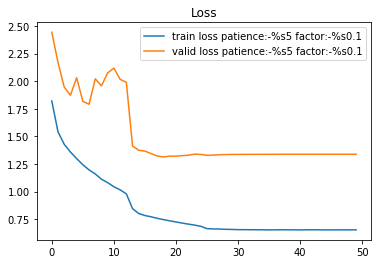

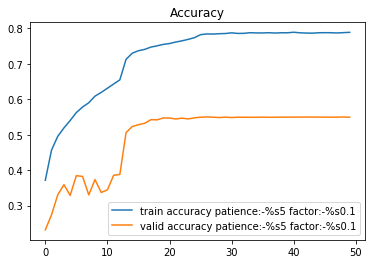

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 10s 202us/step - loss: 0.4708 - acc: 0.8624 - val_loss: 1.4299 - val_acc: 0.54393s - loss: 0.4707 - acc: 0.8 - ETA: 2s - loss: 0.4698 
Epoch 45/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.4706 - acc: 0.8623
Epoch 00045: reducing learning rate to 3.1250002585636594e-10.
50000/50000 [==============================] - 10s 193us/step - loss: 0.4702 - acc: 0.8624 - val_loss: 1.4299 - val_acc: 0.5439
Epoch 46/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.4696 - acc: 0.8618 - val_loss: 1.4299 - val_acc: 0.5440
Epoch 47/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.4708 - acc: 0.8624 - val_loss: 1.4299 - val_acc: 0.5442
Epoch 48/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.4707 - acc: 0.8618 - val_loss: 1.4299 - val_acc: 0.5444
Epoch 49/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.4710 - acc: 0.8610 - val_loss

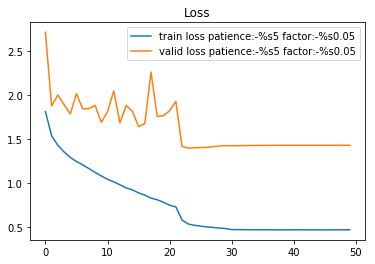

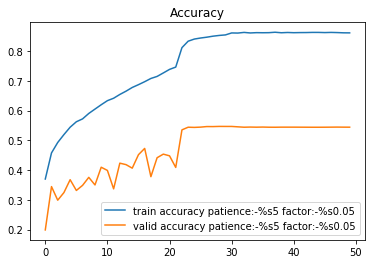

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 9s 184us/step - loss: 0.1445 - acc: 0.9715 - val_loss: 2.2737 - val_acc: 0.5030
Epoch 48/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.1372 - acc: 0.9731
Epoch 00048: reducing learning rate to 0.0001250000059371814.
50000/50000 [==============================] - 9s 185us/step - loss: 0.1370 - acc: 0.9731 - val_loss: 2.3283 - val_acc: 0.5033
Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.1123 - acc: 0.9825 - val_loss: 2.2541 - val_acc: 0.5122
Epoch 50/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.1067 - acc: 0.9846 - val_loss: 2.3131 - val_acc: 0.5099


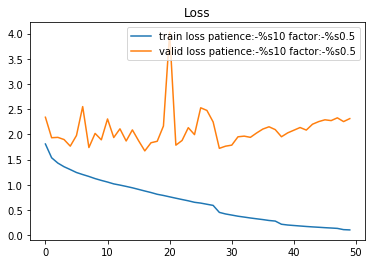

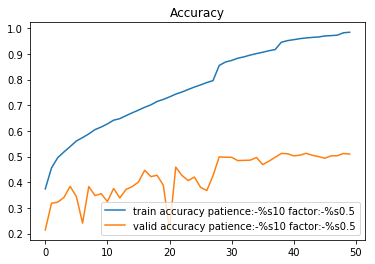

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_33 (Batc (None, 128)               512       
__________

49152/50000 [============================>.] - ETA: 0s - loss: 0.3267 - acc: 0.9154
Epoch 00047: reducing learning rate to 1.0000000656873453e-06.
50000/50000 [==============================] - 9s 185us/step - loss: 0.3266 - acc: 0.9154 - val_loss: 1.6256 - val_acc: 0.5343
Epoch 48/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.3240 - acc: 0.9172 - val_loss: 1.6254 - val_acc: 0.5355
Epoch 49/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3236 - acc: 0.9171 - val_loss: 1.6255 - val_acc: 0.5352
Epoch 50/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.3230 - acc: 0.9178 - val_loss: 1.6257 - val_acc: 0.5343


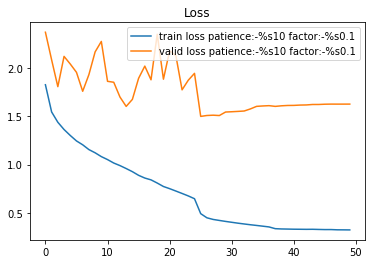

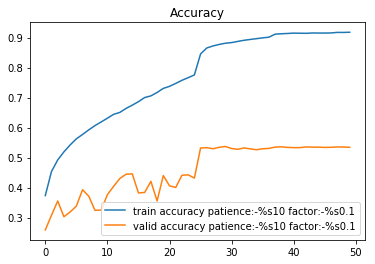

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_34 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_36 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 9s 185us/step - loss: 0.2176 - acc: 0.9530 - val_loss: 1.7744 - val_acc: 0.5346
Epoch 48/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.2174 - acc: 0.9538 - val_loss: 1.7760 - val_acc: 0.5347
Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.2175 - acc: 0.9536 - val_loss: 1.7777 - val_acc: 0.5350
Epoch 50/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.2176 - acc: 0.9541 - val_loss: 1.7797 - val_acc: 0.5352


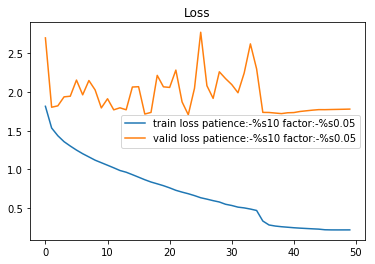

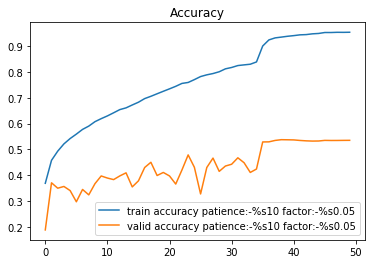

In [11]:
"""
Set model checkpoint callbacks
Write your training loop and show the results
"""
for patience in PATIENCE:
    for factor in FACTOR:
        reduce_lr = ReduceLROnPlateau(factor=factor, 
                                      min_lr=1e-12, 
                                      monitor='val_loss', 
                                      patience=patience, 
                                      verbose=1)

        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[reduce_lr]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        # 繪製結果
        """
        plot the results
        """
        plt.plot(range(len(train_loss)), train_loss, label="train loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_loss)), valid_loss, label="valid loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Loss")
        plt.show()

        plt.plot(range(len(train_acc)), train_acc, label="train accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Accuracy")
        plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_38 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
__________

Epoch 44/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.1671 - acc: 0.9763 - val_loss: 1.8386 - val_acc: 0.5227
Epoch 45/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.1653 - acc: 0.9773 - val_loss: 1.8360 - val_acc: 0.5240
Epoch 46/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.1642 - acc: 0.9772 - val_loss: 1.8420 - val_acc: 0.5212
Epoch 47/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.1641 - acc: 0.9768 - val_loss: 1.8405 - val_acc: 0.5226
Epoch 48/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.1626 - acc: 0.9772
Epoch 00048: reducing learning rate to 7.812500371073838e-06.
50000/50000 [==============================] - 10s 197us/step - loss: 0.1626 - acc: 0.9772 - val_loss: 1.8487 - val_acc: 0.5227
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.1607 - acc: 0.9781 - val_loss: 1.8478 - val_acc: 0.5235
Epoch 50/50
50

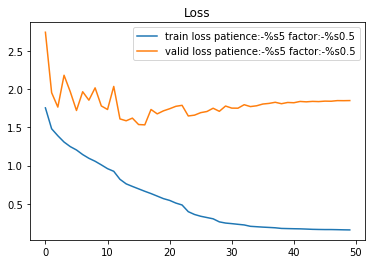

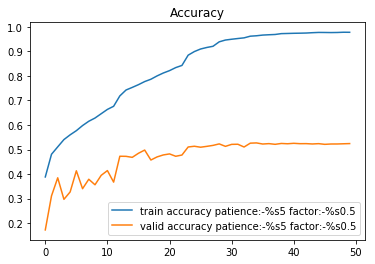

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_42 (Batc (None, 128)               512       
__________

Epoch 43/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6482 - acc: 0.7931 - val_loss: 1.3480 - val_acc: 0.5497
Epoch 44/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6485 - acc: 0.7935 - val_loss: 1.3480 - val_acc: 0.5491
Epoch 45/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6488 - acc: 0.7943 - val_loss: 1.3480 - val_acc: 0.5494
Epoch 46/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6481 - acc: 0.7947 - val_loss: 1.3480 - val_acc: 0.5490
Epoch 47/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.6485 - acc: 0.7937
Epoch 00047: reducing learning rate to 1.000000082740371e-10.
50000/50000 [==============================] - 10s 191us/step - loss: 0.6489 - acc: 0.7934 - val_loss: 1.3481 - val_acc: 0.5494
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6488 - acc: 0.7937 - val_loss: 1.3481 - val_acc: 0.5491
Epoch 49/50
50

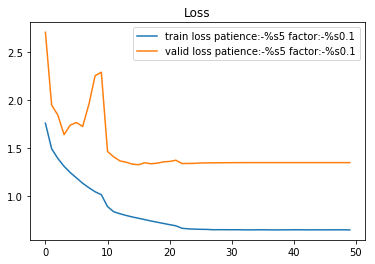

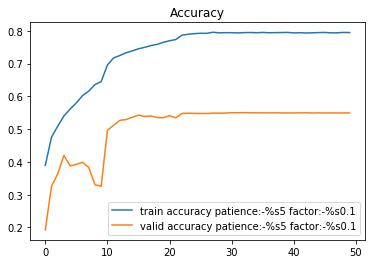

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_43 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_44 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_45 (Batc (None, 128)               512       
__________

Epoch 44/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6222 - acc: 0.8043 - val_loss: 1.3472 - val_acc: 0.5461
Epoch 45/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.6217 - acc: 0.8053
Epoch 00045: reducing learning rate to 1.5625001292818297e-11.
50000/50000 [==============================] - 10s 192us/step - loss: 0.6218 - acc: 0.8054 - val_loss: 1.3472 - val_acc: 0.5464
Epoch 46/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6222 - acc: 0.8042 - val_loss: 1.3472 - val_acc: 0.5462
Epoch 47/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.6217 - acc: 0.8039 - val_loss: 1.3472 - val_acc: 0.5464
Epoch 48/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6212 - acc: 0.8049 - val_loss: 1.3472 - val_acc: 0.5464
Epoch 49/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6226 - acc: 0.8055 - val_loss: 1.3472 - val_acc: 0.5464
Epoch 50/50
4

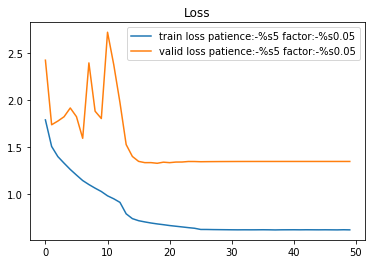

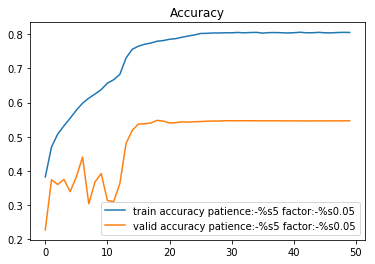

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_47 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_48 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 10s 191us/step - loss: 0.0799 - acc: 0.9933 - val_loss: 2.1894 - val_acc: 0.5216
Epoch 47/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.0767 - acc: 0.9943 - val_loss: 2.2402 - val_acc: 0.5202
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.0738 - acc: 0.9944 - val_loss: 2.2328 - val_acc: 0.5189
Epoch 49/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.0721 - acc: 0.9947 - val_loss: 2.2578 - val_acc: 0.5176
Epoch 50/50
49152/50000 [============================>.] - ETA: 0s - loss: 0.0690 - acc: 0.9951
Epoch 00050: reducing learning rate to 6.25000029685907e-05.
50000/50000 [==============================] - 10s 191us/step - loss: 0.0689 - acc: 0.9951 - val_loss: 2.2735 - val_acc: 0.5213


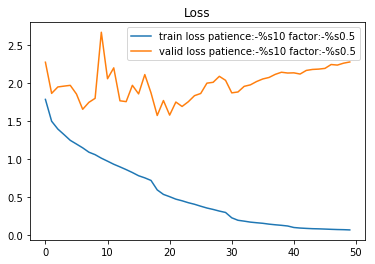

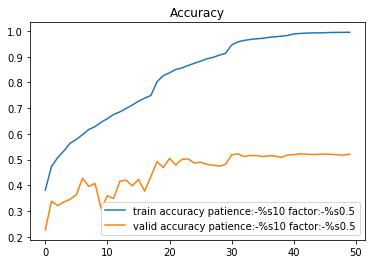

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_49 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_50 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_51 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 10s 193us/step - loss: 0.3432 - acc: 0.9129 - val_loss: 1.5758 - val_acc: 0.5371
Epoch 47/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.3432 - acc: 0.9138 - val_loss: 1.5761 - val_acc: 0.5372
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.3429 - acc: 0.9138 - val_loss: 1.5764 - val_acc: 0.5372
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.3419 - acc: 0.9128 - val_loss: 1.5765 - val_acc: 0.5370
Epoch 50/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.3426 - acc: 0.9126 - val_loss: 1.5768 - val_acc: 0.5368


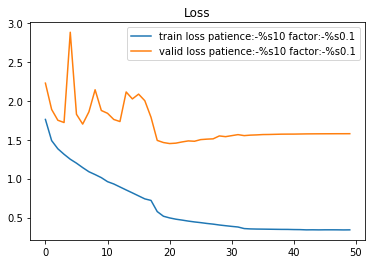

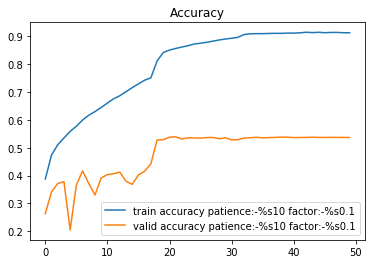

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_52 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_53 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_54 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 10s 191us/step - loss: 0.4681 - acc: 0.8644 - val_loss: 1.4355 - val_acc: 0.5478
Epoch 47/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.4673 - acc: 0.8659 - val_loss: 1.4356 - val_acc: 0.5477
Epoch 48/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.4668 - acc: 0.8657 - val_loss: 1.4356 - val_acc: 0.5479
Epoch 49/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.4677 - acc: 0.8663 - val_loss: 1.4356 - val_acc: 0.5476
Epoch 50/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.4683 - acc: 0.8647 - val_loss: 1.4357 - val_acc: 0.5478


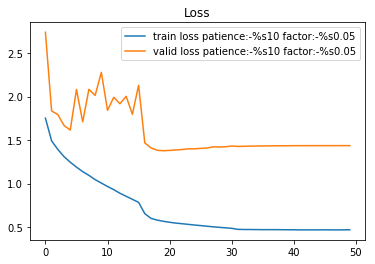

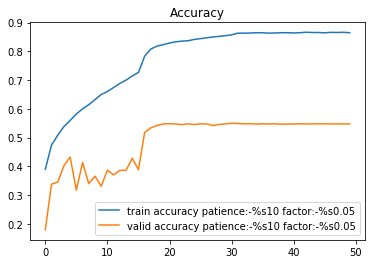

In [12]:
"""
Set model checkpoint callbacks
Write your training loop and show the results
"""
for patience in PATIENCE:
    for factor in FACTOR:
        reduce_lr = ReduceLROnPlateau(factor=factor, 
                                      min_lr=1e-12, 
                                      monitor='val_loss', 
                                      patience=patience, 
                                      verbose=1)

        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[reduce_lr]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        # 繪製結果
        """
        plot the results
        """
        plt.plot(range(len(train_loss)), train_loss, label="train loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_loss)), valid_loss, label="valid loss"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Loss")
        plt.show()

        plt.plot(range(len(train_acc)), train_acc, label="train accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy"+' patience:-%s'+str(patience)+' factor:-%s'+str(factor))
        plt.legend()
        plt.title("Accuracy")
        plt.show()

In [18]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.